In [468]:
#all the important modules and python libraries used in this EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
from random import sample
from scipy.stats import sem

In [469]:
#reading of the csv dataset containing file
df=pd.read_csv("/Users/vanshikagoel/Desktop/SDS/SDS Datathon Stuff/Datathon/23.csv")
df

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,98.0,99.0,88.0
1,female,group B,master's degree,free/reduced,none,95.0,117.0,102.0
2,male,group E,master's degree,free/reduced,none,116.0,22.0,48.0
3,female,group C,master's degree,free/reduced,none,73.0,84.0,58.0
4,female,group C,some college,free/reduced,none,102.0,105.0,89.0
...,...,...,...,...,...,...,...,...
995,male,group B,some college,free/reduced,none,114.0,119.0,109.0
996,female,group B,master's degree,free/reduced,none,88.0,82.0,69.0
997,male,group C,some college,free/reduced,none,85.0,98.0,79.0
998,male,group B,master's degree,free/reduced,none,94.0,105.0,91.0


In [470]:
#this helped keep a track of all the categorical and numerical data
df.dtypes

gender                          object
race                            object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

In [471]:
#for a boolean like representation of all the null values in the given dataset
df.isnull()

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [472]:
#this gives concrete value to the total number of null values which should be 0 after data cleaning
print(df.isnull().sum())

gender                         0
race                           0
parental level of education    3
lunch                          0
test preparation course        0
math score                     4
reading score                  4
writing score                  4
dtype: int64


In [473]:
#this helps give very important information regarding the maximum and minimum value in the column
df['math score'].describe()

count    996.000000
mean      90.021084
std       17.396891
min       20.000000
25%       80.000000
50%       91.000000
75%      102.000000
max      120.000000
Name: math score, dtype: float64

In [474]:
#this helps give very important information regarding the maximum and minimum value in the column
df['reading score'].describe()

count    996.000000
mean      93.280120
std       17.838777
min       20.000000
25%       84.000000
50%       95.000000
75%      106.000000
max      120.000000
Name: reading score, dtype: float64

In [475]:
#this helps give very important information regarding the maximum and minimum value in the column
df['writing score'].describe()

count    996.000000
mean      80.730924
std       16.830037
min       21.000000
25%       70.000000
50%       82.000000
75%       92.000000
max      117.000000
Name: writing score, dtype: float64

In [476]:
#Introductory Q1
#after making necessary changes to the dataset to bring it within the correct range; I calculated the percentage 
#for the 3 subjects
df['math score'] = df['math score'] - 20
df['reading score'] = df['reading score'] - 20
df['writing score'] = df['writing score'] - 17
columns_list=['math score','reading score','writing score']
df['percentage'] = ((df[columns_list].sum(axis=1))/3)

In [477]:
df
#new column containing percentage created

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage
0,female,group B,bachelor's degree,standard,none,78.0,79.0,71.0,76.000000
1,female,group B,master's degree,free/reduced,none,75.0,97.0,85.0,85.666667
2,male,group E,master's degree,free/reduced,none,96.0,2.0,31.0,43.000000
3,female,group C,master's degree,free/reduced,none,53.0,64.0,41.0,52.666667
4,female,group C,some college,free/reduced,none,82.0,85.0,72.0,79.666667
...,...,...,...,...,...,...,...,...,...
995,male,group B,some college,free/reduced,none,94.0,99.0,92.0,95.000000
996,female,group B,master's degree,free/reduced,none,68.0,62.0,52.0,60.666667
997,male,group C,some college,free/reduced,none,65.0,78.0,62.0,68.333333
998,male,group B,master's degree,free/reduced,none,74.0,85.0,74.0,77.666667


In [478]:
#Introductory Q2
#this cleanes the math score column by filling the null values with the mean
df['math score'].mean()
df['math score'].fillna(df['math score'].mean(), inplace=True)

In [479]:
#Introductory Q2
#this cleanes the reading score column by filling the null values with the mean
df['reading score'].mean()
df['reading score'].fillna(df['reading score'].mean(), inplace=True)

In [480]:
#Introductory Q2
#this cleanes the writing score column by filling the null values with the mean
df['writing score'].mean()
df['writing score'].fillna(df['writing score'].mean(), inplace=True)

In [481]:
df=df.dropna()
#this will drop any rows with null values in the columns containing categorial data

In [482]:
print(df.isnull().sum())
#this shows that there are now no null values in the dataframe; hence, the dataset has been cleaned.

gender                         0
race                           0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
percentage                     0
dtype: int64


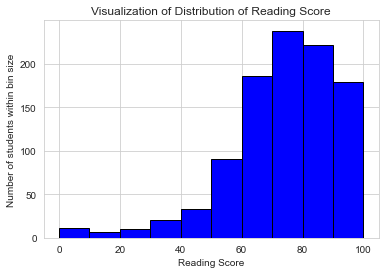

In [483]:
#Introductory Q3
#visualization of the distribution of reading score of all the students.
plt.hist(df['reading score'], bins = 10,color="blue",edgecolor="black")
plt.xlabel("Reading Score")
plt.ylabel("Number of students within bin size")
plt.title('Visualization of Distribution of Reading Score')
plt.show()
#this visualization is similar to right skewed/negative skewed plots. 
#Formulae: Range= Max-Min; class width=range/sqrt(no of intervals); area of histogram is sum of all the 
#products of frequency densities and class widths

In [484]:
#Introductory Q4
per_grades = ['F', 'D', 'C', 'B', 'A','S']
bins =[0, 40, 60, 70, 80, 90, 100]
df['grades'] = pd.cut(df['math score'], bins=bins, labels = per_grades)
#i defined all the grades according to the grading system given in the question

/var/folders/52/rhfhtj0s4jz549wxg4x1mtcr0000gn/T/ipykernel_27588/2164911615.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grades'] = pd.cut(df['math score'], bins=bins, labels = per_grades)


In [485]:
df
#the dataset now has a new column grades with nominal values on the basis of a grading system done on percentage

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grades
0,female,group B,bachelor's degree,standard,none,78.0,79.0,71.0,76.000000,B
1,female,group B,master's degree,free/reduced,none,75.0,97.0,85.0,85.666667,B
2,male,group E,master's degree,free/reduced,none,96.0,2.0,31.0,43.000000,S
3,female,group C,master's degree,free/reduced,none,53.0,64.0,41.0,52.666667,D
4,female,group C,some college,free/reduced,none,82.0,85.0,72.0,79.666667,A
...,...,...,...,...,...,...,...,...,...,...
995,male,group B,some college,free/reduced,none,94.0,99.0,92.0,95.000000,S
996,female,group B,master's degree,free/reduced,none,68.0,62.0,52.0,60.666667,C
997,male,group C,some college,free/reduced,none,65.0,78.0,62.0,68.333333,C
998,male,group B,master's degree,free/reduced,none,74.0,85.0,74.0,77.666667,B


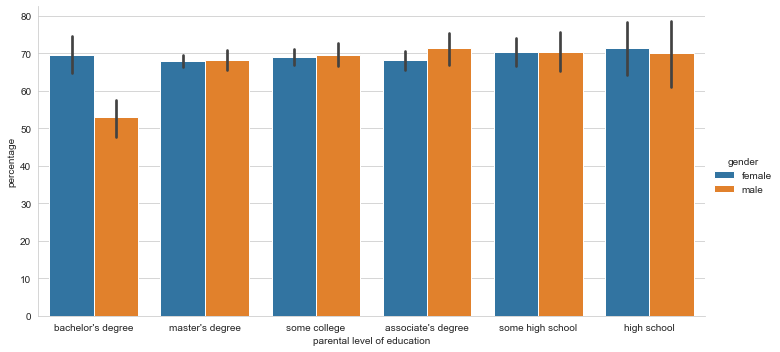

In [486]:
#Introductory Q5
sns.catplot(x='parental level of education', y='percentage', hue='gender', data=df, kind='bar', aspect=2)
#plot of a grouped bar chart visualizing the distribution of percentage across parental level of education
#split by gender

In [487]:
#Task Q1a
#100 samples from the population using simple random sampling
simple_rs = df.sample(n = 100)
simple_rs

,gender,race,parental level of education,lunch,test preparation course,math score,reading score,writing score,percentage,grades
857,male,group B,master's degree,free/reduced,none,71.0,86.0,78.0,78.333333,B
237,female,group B,some college,free/reduced,none,70.0,67.0,71.0,69.333333,C
751,female,group D,some high school,free/reduced,none,74.0,79.0,62.0,71.666667,B
732,female,group B,master's degree,free/reduced,none,93.0,96.0,91.0,93.333333,S
438,female,group B,master's degree,free/reduced,none,65.0,63.0,48.0,58.666667,C
...,...,...,...,...,...,...,...,...,...,...
558,female,group E,some college,free/reduced,none,59.0,77.0,67.0,67.666667,D
301,female,group E,associate's degree,free/reduced,none,62.0,61.0,49.0,57.333333,C
304,female,group B,some college,free/reduced,none,80.0,22.0,80.0,60.666667,B
998,male,group B,master's degree,free/reduced,none,74.0,85.0,74.0,77.666667,B


In [488]:
#Task Q1b
#100 samples from the population using stratifies random sampling with race as strata
stratified_rs = df.groupby('race').apply(lambda x: x.sample(frac=0.1))
stratified_rs

gender     race parental level of education         lunch  \
race                                                                     
group A 118  female  group A                 high school      standard   
        111  female  group A             master's degree  free/reduced   
        887  female  group A             master's degree  free/reduced   
group B 502  female  group B             master's degree      standard   
        438  female  group B             master's degree  free/reduced   
...             ...      ...                         ...           ...   
group E 202  female  group E             master's degree      standard   
        147    male  group E            some high school  free/reduced   
        317    male  group E             master's degree  free/reduced   
        522  female  group E             master's degree  free/reduced   
        399  female  group E                some college  free/reduced   

            test preparation course  math score  reading score  writing score  \
race                                                                            
group A 118                    none   57.000000           70.0           75.0   
        111                    none   68.000000           62.0           46.0   
        887                    none   60.000000           79.0           56.0   
group B 502                    none   69.000000           68.0           51.0   
        438                    none   65.000000           63.0           48.0   
...                             ...         ...            ...            ...   
group E 202                    none   75.000000           84.0           66.0   
        147                    none   79.000000            0.0           63.0   
        317                    none   89.000000           79.0           75.0   
        522                    none   70.021084           32.0           54.0   
        399                    none   66.000000           66.0           51.0   

             percentage grades  
race                            
group A 118   67.333333      D  
        111   58.666667      C  
        887   65.000000      D  
group B 502   62.666667      C  
        438   58.666667      C  
...                 ...    ...  
group E 202   75.000000      B  
        147   47.333333      B  
        317   81.000000      A  
        522   28.666667      B  
        399   61.000000      C  

[99 rows x 10 columns]

In [489]:
#Task Q1c
#calculation of mean math marks of the sample obtained by simple random sampling in Task Q1a
simple_rs['math score'].mean()

68.75042168674699

In [490]:
#Task Q1c
#calculation of mean math marks of the sample obtained by stratified random sampling in Task Q1b
stratified_rs['math score'].mean()

68.53577948156263

In [491]:
#Task Q1c
#calculation of sampling error in calculation of mean math marks of the sample obtained 
#by simple random sampling in Task Q1a
simple_rs['math score'].sem(axis = 0)

2.0334787899538704

In [492]:
#Task Q1c
#calculation of sampling error in calculation of mean math marks of the sample obtained 
#by stratified random sampling in Task Q1b
stratified_rs['math score'].sem(axis = 0)

1.879506558635597

In [493]:
#Sampling error is lower in Stratified Random Sampling

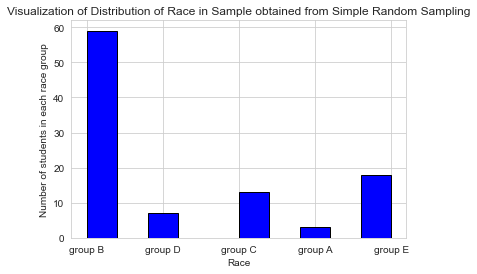

In [494]:
#Task Q1d
#Distribution of Race for the mean marks obtained in Task Q1a
plt.hist(simple_rs['race'], bins = 10,color="blue",edgecolor="black")
plt.xlabel("Race")
plt.ylabel("Number of students in each race group")
plt.title('Visualization of Distribution of Race in Sample obtained from Simple Random Sampling')
plt.show()

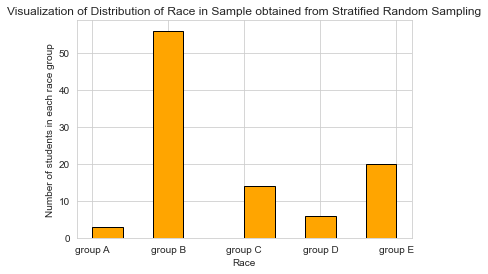

In [495]:
#Task Q1d
#Distribution of Race for the mean marks obtained in Task Q1b
plt.hist(stratified_rs['race'], bins = 10,color="orange",edgecolor="black")
plt.xlabel("Race")
plt.ylabel("Number of students in each race group")
plt.title('Visualization of Distribution of Race in Sample obtained from Stratified Random Sampling')
plt.show()

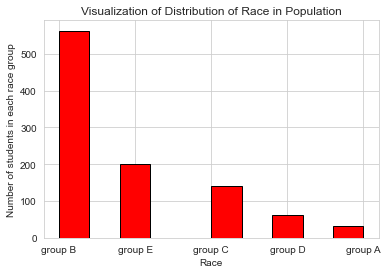

In [496]:
#Task Q1d
#Distribution of Race for the population
plt.hist(df['race'], bins = 10,color="red",edgecolor="black")
plt.xlabel("Race")
plt.ylabel("Number of students in each race group")
plt.title('Visualization of Distribution of Race in Population')
plt.show()

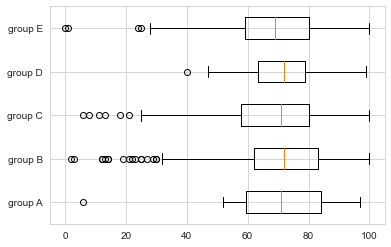

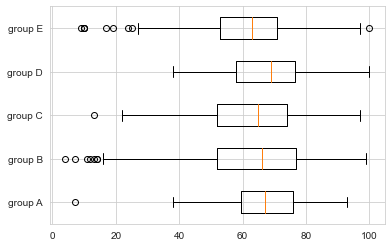

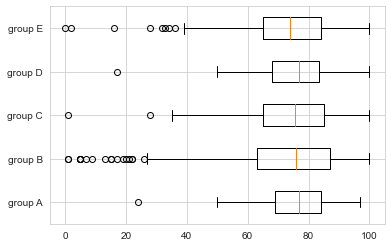

In [497]:
#Task Q2
#Boxplots for each score against race
grp_a_math=df[df['race']=='group A']['math score']
grp_b_math=df[df['race']=='group B']['math score']
grp_c_math=df[df['race']=='group C']['math score']
grp_d_math=df[df['race']=='group D']['math score']
grp_e_math=df[df['race']=='group E']['math score']
values=[grp_a_math,grp_b_math,grp_c_math,grp_d_math,grp_e_math]
plt.boxplot(values, vert=False,labels=['group A','group B','group C','group D','group E'])
plt.show()
grp_a_writing=df[df['race']=='group A']['writing score']
grp_b_writing=df[df['race']=='group B']['writing score']
grp_c_writing=df[df['race']=='group C']['writing score']
grp_d_writing=df[df['race']=='group D']['writing score']
grp_e_writing=df[df['race']=='group E']['writing score']
values1=[grp_a_writing,grp_b_writing,grp_c_writing,grp_d_writing,grp_e_writing]
plt.boxplot(values1, vert=False,labels=['group A','group B','group C','group D','group E'])
plt.show()
grp_a_reading=df[df['race']=='group A']['reading score']
grp_b_reading=df[df['race']=='group B']['reading score']
grp_c_reading=df[df['race']=='group C']['reading score']
grp_d_reading=df[df['race']=='group D']['reading score']
grp_e_reading=df[df['race']=='group E']['reading score']
values=[grp_a_reading,grp_b_reading,grp_c_reading,grp_d_reading,grp_e_reading]
plt.boxplot(values, vert=False,labels=['group A','group B','group C','group D','group E'])
plt.show()

In [498]:
#Most number of outliers are present in the race against reading score boxplot; as determined visually.

In [ ]:
##END OF NOTEBOOK